In [1]:
import os

# Define the root directory where 'reduceddata' is located
root_directory = 'reduceddata'

# Initialize dictionaries to store counts
data_counts = {'train': {}, 'test': {}, 'valid': {}}
severity_counts = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}

# Iterate through the folders
for data_type in ['train', 'test', 'valid']:
    data_folder = os.path.join(root_directory, data_type)
    
    # Initialize counts for severity levels
    severity_counts_per_data = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}
    
    # Iterate through severity subfolders
    for severity_level in ['0', '1', '2', '3', '4']:
        severity_folder = os.path.join(data_folder, severity_level)
        
        # Count the number of images in the severity folder
        num_images = len(os.listdir(severity_folder))
        
        # Store the count in the dictionary
        severity_counts_per_data[severity_level] = num_images
        
        # Update the overall severity count
        severity_counts[severity_level] += num_images
    
    # Store the severity counts for this data type
    data_counts[data_type] = severity_counts_per_data

# Print the counts in a table format
print("Data Type\tSeverity 0\tSeverity 1\tSeverity 2\tSeverity 3\tSeverity 4")
for data_type in ['train', 'test', 'valid']:
    counts = data_counts[data_type]
    print(f"{data_type}\t\t{counts['0']}\t\t{counts['1']}\t\t{counts['2']}\t\t{counts['3']}\t\t{counts['4']}")

# Print overall severity counts
print("\nOverall Severity Counts:")
print("Severity 0:", severity_counts['0'])
print("Severity 1:", severity_counts['1'])
print("Severity 2:", severity_counts['2'])
print("Severity 3:", severity_counts['3'])
print("Severity 4:", severity_counts['4'])


Data Type	Severity 0	Severity 1	Severity 2	Severity 3	Severity 4
train		780		704		747		551		496
test		211		179		192		127		106
valid		211		180		199		126		106

Overall Severity Counts:
Severity 0: 1202
Severity 1: 1063
Severity 2: 1138
Severity 3: 804
Severity 4: 708


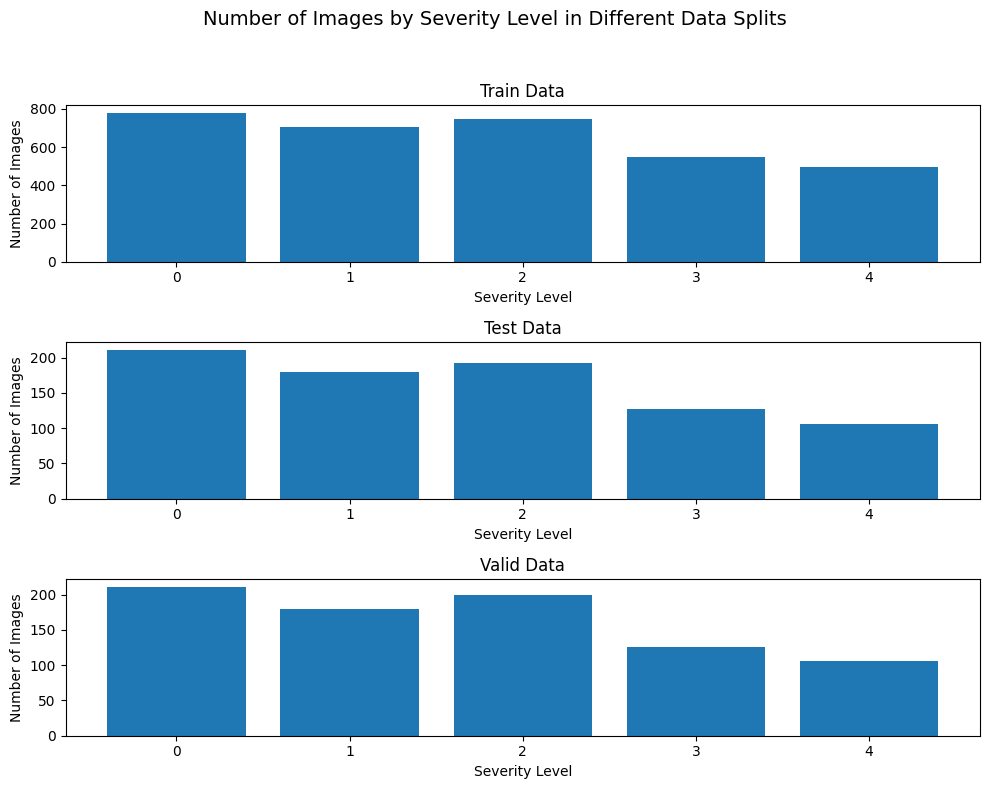

In [2]:
import matplotlib.pyplot as plt

# Data from the previous code snippet
data_types = ['train', 'test', 'valid']
severity_levels = ['0', '1', '2', '3', '4']

# Create subplots for each data type
fig, axs = plt.subplots(len(data_types), figsize=(10, 8))

for i, data_type in enumerate(data_types):
    counts = data_counts[data_type]
    
    # Convert counts dictionary to a list of counts in order of severity levels
    severity_counts_list = [counts[level] for level in severity_levels]
    
    # Bar chart
    axs[i].bar(severity_levels, severity_counts_list)
    axs[i].set_title(f"{data_type.capitalize()} Data")
    axs[i].set_xlabel("Severity Level")
    axs[i].set_ylabel("Number of Images")

# Add a common title for all subplots
plt.suptitle("Number of Images by Severity Level in Different Data Splits", fontsize=14)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()


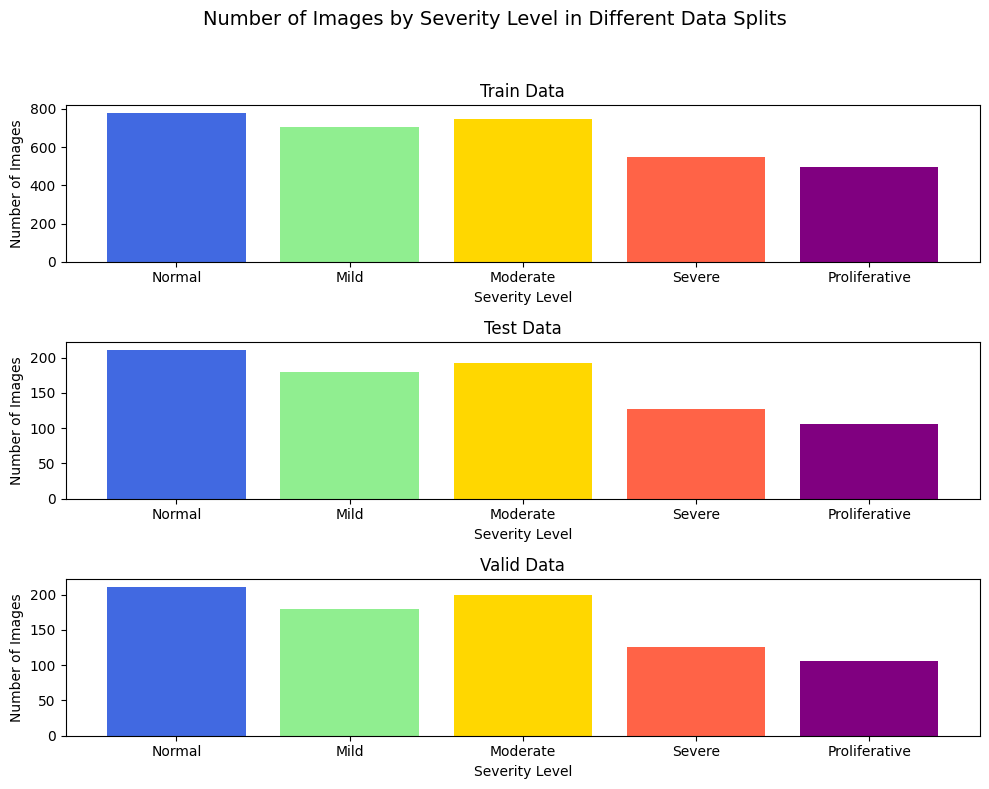

In [3]:
import matplotlib.pyplot as plt

# Data from the previous code snippet
data_types = ['train', 'test', 'valid']
severity_labels = ['Normal', 'Mild', 'Moderate', 'Severe', 'Proliferative']

# Define colors for the bar charts
colors = ['royalblue', 'lightgreen', 'gold', 'tomato', 'purple']

# Create subplots for each data type
fig, axs = plt.subplots(len(data_types), figsize=(10, 8))

for i, data_type in enumerate(data_types):
    counts = data_counts[data_type]
    
    # Convert counts dictionary to a list of counts in order of severity levels
    severity_counts_list = [counts[str(level)] for level in range(5)]
    
    # Bar chart with labels and colors
    axs[i].bar(severity_labels, severity_counts_list, color=colors)
    axs[i].set_title(f"{data_type.capitalize()} Data")
    axs[i].set_xlabel("Severity Level")
    axs[i].set_ylabel("Number of Images")

# Add a common title for all subplots
plt.suptitle("Number of Images by Severity Level in Different Data Splits", fontsize=14)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()


In [4]:
import csv

# Define the filename for the CSV file
csv_filename = 'eye_disease_data.csv'  # You can change the filename as needed

# Define the data to be written to the CSV file
data = [
    ['Data Type', 'Normal', 'Mild', 'Moderate', 'Severe', 'Proliferative'],
    ['train', data_counts['train']['0'], data_counts['train']['1'], data_counts['train']['2'],
     data_counts['train']['3'], data_counts['train']['4']],
    ['test', data_counts['test']['0'], data_counts['test']['1'], data_counts['test']['2'],
     data_counts['test']['3'], data_counts['test']['4']],
    ['valid', data_counts['valid']['0'], data_counts['valid']['1'], data_counts['valid']['2'],
     data_counts['valid']['3'], data_counts['valid']['4']]
]

# Write data to the CSV file
with open(csv_filename, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(data)

# Print a success message
print(f"Data has been exported to '{csv_filename}'.")


Data has been exported to 'eye_disease_data.csv'.
